In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/MyDrive/8° Semestre/IA M2 Benji"
!ls

Mounted at /content/drive
/content/drive/MyDrive/8° Semestre/IA M2 Benji
 augmented			    'Copia de Model Tunning.ipynb'   ModelASLImprovement.keras
 Augmented			     Dataset2_1			    'ModelTraining (1).ipynb'
'Copia de Data augmentation.ipynb'   images			     ModelTraining.ipynb


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print(tf.__version__)

2.15.0


In [3]:
base_dir = 'Dataset2_1'
train_dir = os.path.join(base_dir,'Train')
test_dir = os.path.join(base_dir, 'Test')

class_names = sorted(os.listdir(train_dir))
class_labels = {
    'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9,
    'K': 10, 'L': 11, 'M': 12, 'N': 13, 'Nothing': 14, 'O': 15, 'P': 16, 'Q': 17,
    'R': 18, 'S': 19, 'Space': 20, 'T': 21, 'U': 22, 'V': 23, 'W': 24, 'X': 25,
    'Y': 26, 'Z': 27
}

In [ ]:
def rename_images_with_labels(dataset_dir):
    class_names = os.listdir(dataset_dir)

    for class_name in class_names:
        class_dir = os.path.join(dataset_dir, class_name)
        if os.path.isdir(class_dir):
            files = os.listdir(class_dir)
            files.sort()
            for i, file_name in enumerate(files, start=1):
                file_ext = os.path.splitext(file_name)[1]
                new_file_name = f"{class_name}{i}{file_ext}"
                os.rename(os.path.join(class_dir, file_name), os.path.join(class_dir, new_file_name))
                print(f"Renamed: {file_name} to {new_file_name}")

rename_images_with_labels(train_dir)

In [ ]:
rename_images_with_labels(test_dir)

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    preprocessing_function=tf.image.rgb_to_grayscale,
    validation_split=0.2
    )
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    preprocessing_function=tf.image.rgb_to_grayscale
    )
test_datagen = ImageDataGenerator(
    rescale=1./255,
    preprocessing_function=tf.image.rgb_to_grayscale
    )

Found 22400 images belonging to 28 classes.
Found 5600 images belonging to 28 classes.
Found 6900 images belonging to 28 classes.


<Figure size 640x480 with 0 Axes>

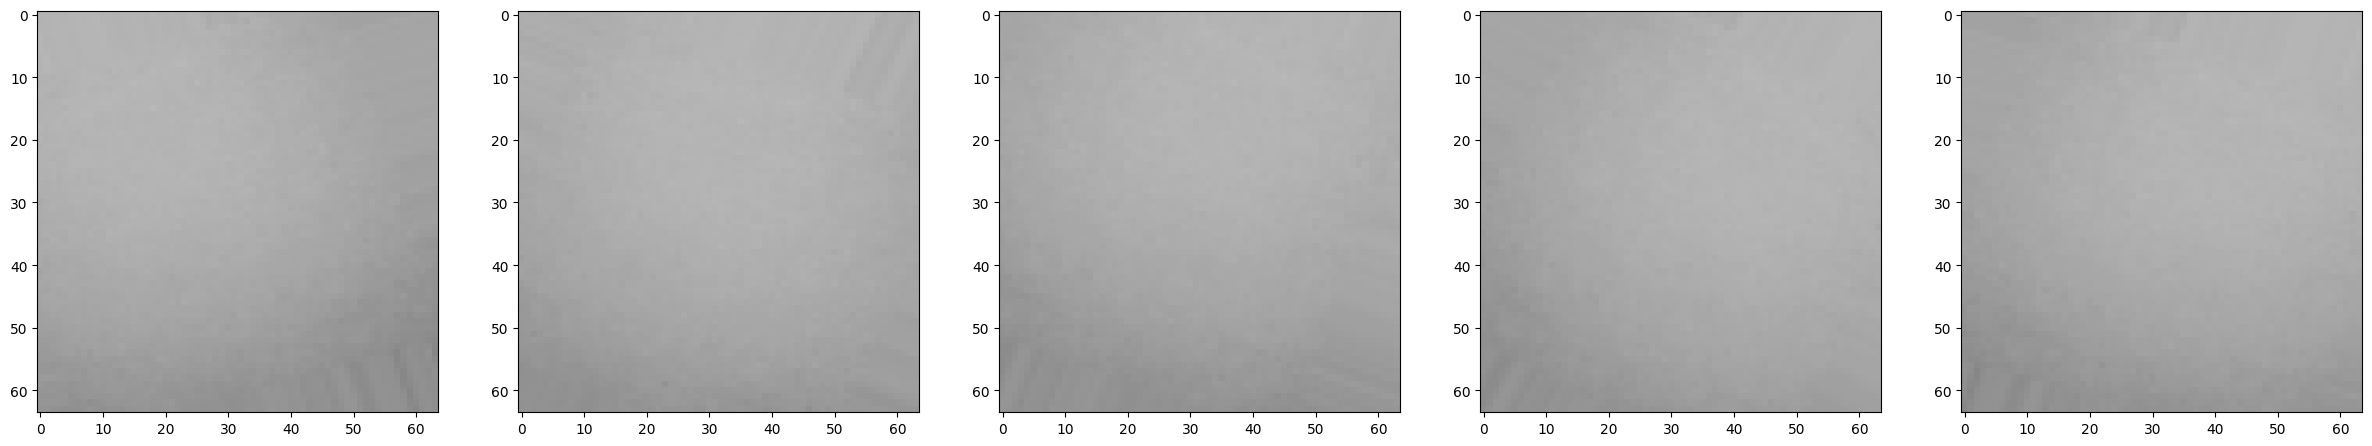

In [5]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (64, 64),
    batch_size = 64,
    class_mode='sparse',
    subset='training',
    classes=class_names,
    shuffle=True,
    seed=42
    )

validation_generator = train_datagen.flow_from_directory(
    'Dataset2_1/Train',
    target_size=(64, 64),
    batch_size=64,
    class_mode='sparse',
    subset='validation',
    classes=class_names,
    shuffle=True,
    seed=42
    )
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=1,
    class_mode='sparse',
    classes=class_names,
    shuffle=False
    )

plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, 5, figsize=(30, 8))

for i in range(5) :
  axarr[i].imshow(train_generator[0][0][0], cmap='gray')

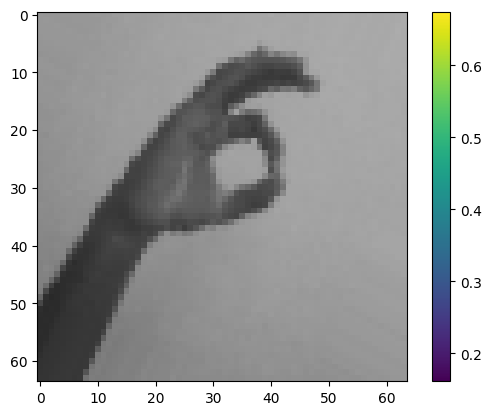

In [6]:
batch_images, batch_labels = train_generator.next()
plt.figure()
plt.imshow(batch_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

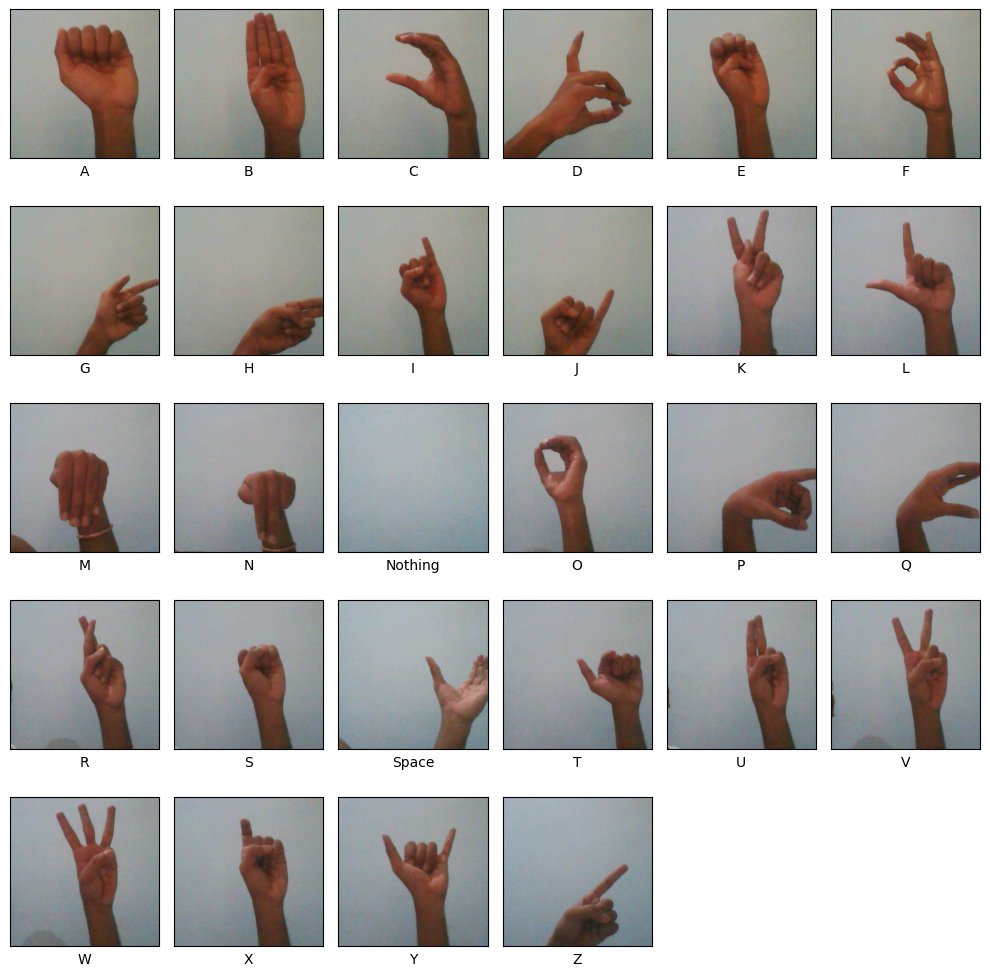

In [7]:
plt.figure(figsize=(10, 10))
images_per_class = 1
images_shown = 0
class_counts = {class_name: 0 for class_name in class_names}

for class_name in class_names:
    class_dir = os.path.join(train_dir, class_name)
    if os.path.isdir(class_dir):
        class_files = os.listdir(class_dir)
        if class_files:
            class_files.sort()
            image_path = os.path.join(class_dir, class_files[0])
            image = plt.imread(image_path)
            plt.subplot(5, 6, images_shown + 1)
            plt.xticks([])
            plt.yticks([])
            plt.grid(False)
            plt.imshow(image, cmap=plt.cm.binary)
            plt.xlabel(class_name)
            images_shown += 1
            if images_shown >= len(class_names) * images_per_class:
                break

plt.tight_layout()
plt.show()

In [8]:
from tensorflow.keras import optimizers, callbacks
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(len(class_names), activation='softmax')
])

model.summary()

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 128)         0

Epoch 1/10
350/350 [==============================] - 13341s 38s/step - loss: 2.1646 - accuracy: 0.3292 - val_loss: 1.1531 - val_accuracy: 0.6289
Epoch 2/10
350/350 [==============================] - 464s 1s/step - loss: 0.6231 - accuracy: 0.7854 - val_loss: 0.7896 - val_accuracy: 0.7598
Epoch 3/10
350/350 [==============================] - 454s 1s/step - loss: 0.2813 - accuracy: 0.9037 - val_loss: 0.5567 - val_accuracy: 0.8320
Epoch 4/10
350/350 [==============================] - 443s 1s/step - loss: 0.1872 - accuracy: 0.9372 - val_loss: 0.2707 - val_accuracy: 0.9200
Epoch 5/10
350/350 [==============================] - 435s 1s/step - loss: 0.1210 - accuracy: 0.9583 - val_loss: 0.2484 - val_accuracy: 0.9220
Epoch 6/10
350/350 [==============================] - 451s 1s/step - loss: 0.1004 - accuracy: 0.9666 - val_loss: 0.1932 - val_accuracy: 0.9439
Epoch 7/10
350/350 [==============================] - 442s 1s/step - loss: 0.0811 - accuracy: 0.9729 - val_loss: 0.2135 - val_accuracy: 0.9

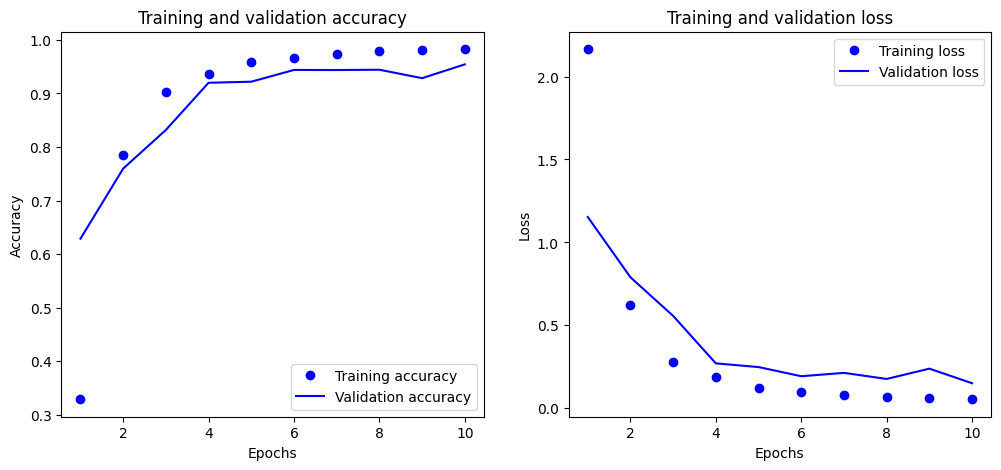

In [9]:
def early_stopping(monitor='val_loss', min_delta=0, patience=5):
    return callbacks.EarlyStopping(monitor=monitor, min_delta=min_delta, patience=patience, restore_best_weights=True)
early_stop = early_stopping(monitor='val_loss', patience=3)  # Monitor validation loss

history = model.fit(train_generator,
                    epochs=10,
                    validation_data=validation_generator,
                    callbacks=[early_stop])

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

350/351 [============================>.] - ETA: 0s

351/351 [==============================] - 270s 768ms/step


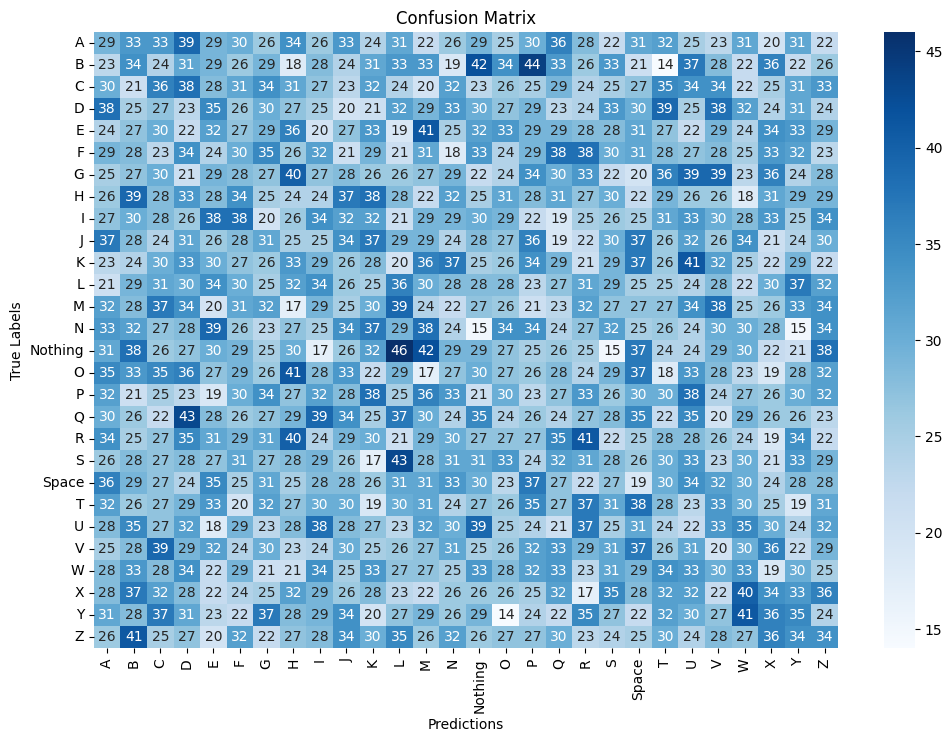

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

true_labels = train_generator.classes

# Get the number of test samples
num_test_samples = len(train_generator.filenames)

# Get predictions for the entire test dataset
predictions = model.predict(train_generator, steps=num_test_samples // train_generator.batch_size + 1)

# Extract predicted labels
predicted_labels = np.argmax(predictions, axis=1)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Visualization
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predictions')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [11]:
model.save("ModelASLImprovement.keras")